# Linear Regression with Normal Equation

In [2]:
# %matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
X = df.values
y = boston.target

In [15]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [17]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [18]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [19]:
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse

4.55236459846306

In [20]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.72402343733974

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

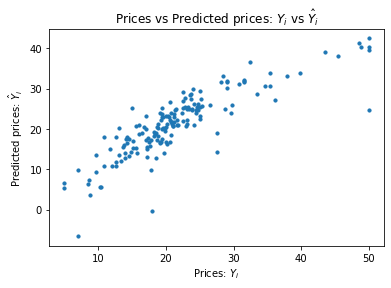

In [21]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [22]:
lr_ne.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

# Linear Regression with SGD

In [24]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [26]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)  # 학습할 땐 scaled가 아닌 그냥 X

In [28]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [29]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [30]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

# rmse가 엄청나게 크다: 학습이 잘 안 되었다.
# (learning rate가 너무 크다 / 충분하게 돌지 못했다)

(18703379114659.043, 3.4981639030666405e+26)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

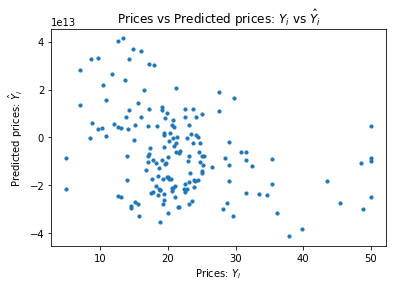

In [31]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# 그래프가 중구난방

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42) # scaled된 X

In [33]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [34]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [35]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

# rmse의 값이 안정적

(4.601601604827129, 21.17473732954761)

- scaling을 시켜주고싶지 않다면?

In [ ]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor(n_iter=10000000, eta0=0.00001, learning_rate="constant")

# 이런식으로 설정하기

# Linear Regression with Ridge & Lasso Regression

In [36]:
from sklearn.linear_model import Lasso, Ridge

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [38]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)
# lasso = Lasso(fit_intercept=True, alpha=0.5)

Ridge(alpha=0.5)

In [39]:
y_hat = ridge.predict(X_test)
y_true = y_test

mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.579058484791168, 20.967776607137985)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

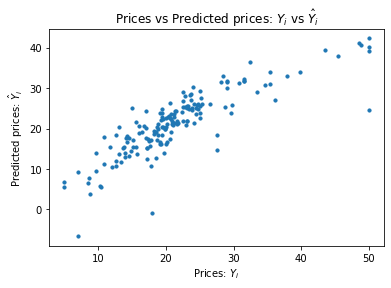

In [40]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")